# Obligatorisk innlevering 2 - oppgave 1

Denne oppgaven tar for seg et datasett fra Food Mart, som er ennærbutikkjede i USA. Food Mart har i dette datasettet samlet endel data i forbindelse med mediekampanjer. Din oppgave er å forutsi kostnadene for mediekampanjer i matvaremarkedet på grunnlag av funksjonene som tilbys.

In [1]:
# Importer resten av pakkene du trenger her:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett1.csv")
# Her deler jeg datasettet inn i egenskaper (X) og target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
# PS: Ikke endre denne kodecellen!

#### Oppgave 1.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? 

Begrunn svaret

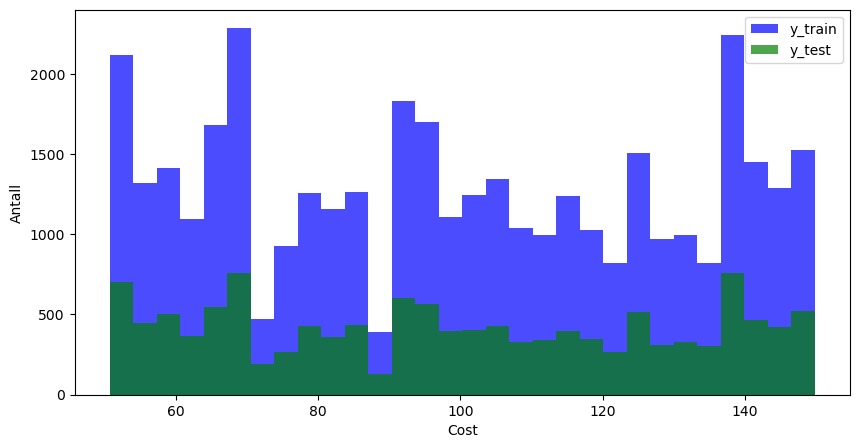

In [3]:
#TODO: visualiser y_train og y_test i et histogram
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.hist(np.asarray(y_train), bins=30, color='blue', alpha=0.7, label='y_train')
plt.hist(np.asarray(y_test), bins=30, color='green', alpha=0.7, label='y_test')
plt.xlabel("Cost")
plt.ylabel("Antall")
plt.legend()
plt.show()

**Svar:**

*Når vi ser på histogrammene for y_train og y_test, viser de en jevn fordeling av kontinuerlige verdier over hele spekteret fra rundt 50 til 150. I et klassifikasjonsproblem ville vi forventet å se tydelige topper ved bestemte verdier som representerer de ulike klassene, noe som ville skapt distinkte "klynger" i histogrammet. Her, derimot, sprer verdiene seg jevnt uten markerte konsentrasjoner i enkelte områder.*

*Histogrammene viser mange ulike nivåer av cost, noe som tyder på at målvariabelen er kontinuerlig snarere enn kategorisk. Fordelingen av y_train og y_test ser jevn og glidende ut, uten tydelige hopp mellom bestemte verdier, noe som ytterligere støtter en regresjonstilnærming. Denne jevne spredningen av verdier tyder derfor på at vi har å gjøre med en regresjonsoppgave, siden et klassifikasjonsproblem ville hatt en helt annen fordeling med et begrenset antall diskrete verdier.*

#### Oppgave 1.2) 

fullfør funksjonen under slik at den tar inn både egenskapene og target, legger disse sammen i samme matrise igjen og visualiser dataene som en korrelasjonsmatrise (poenget er at du skal kunne se hvordan egenskapene korrelerer med target).

* Beskriv hvilke egenskaper du ser korrelerer mest med target

In [4]:
def korrelasjonsmatrise(X,y):
    X_temp = X.copy()
    y_temp = y.copy()
    X_temp["Target"] = y_temp
    #TODO: Fullfør koden
    # Beregn korrelasjonsmatrisen
    corr_matrix = X_temp.corr()
    
    # Visualiser korrelasjonsmatrisen som et varmekart
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
    plt.title("Korrelasjonsmatrise mellom egenskaper og target")
    plt.show()

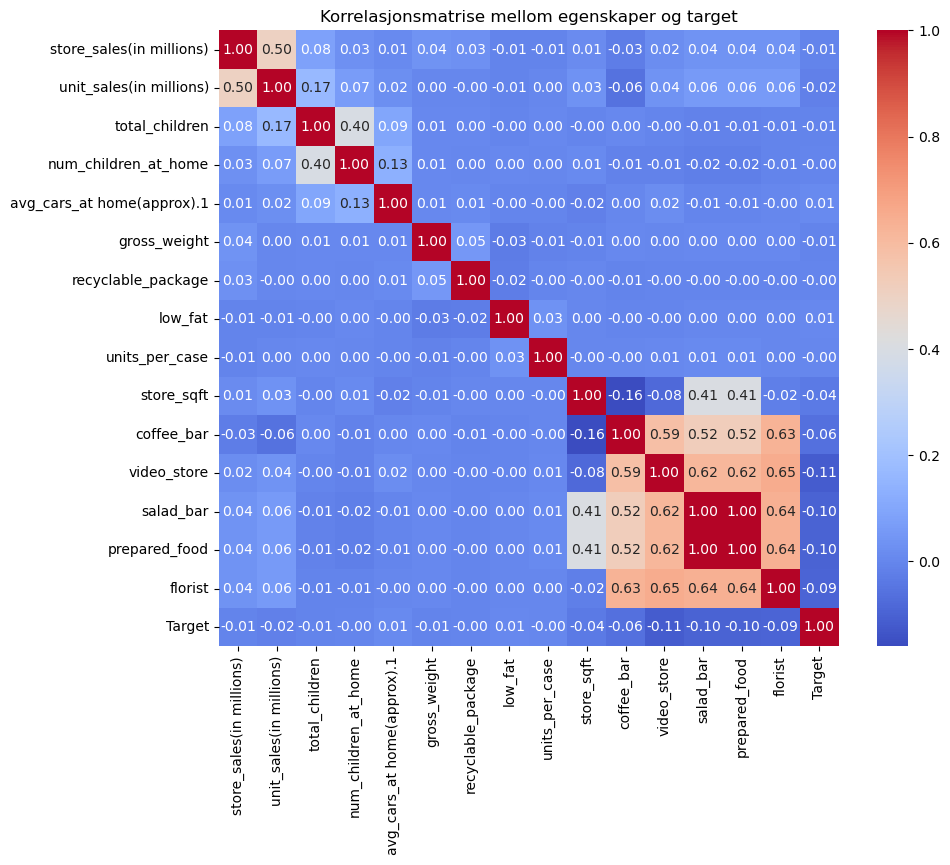

In [5]:
korrelasjonsmatrise(X_train,y_train)

**Svar:**

*Korrelasjonsmatrisen viser at ingen av egenskapene har en sterk lineær sammenheng med target-variabelen. De fleste korrelasjonsverdiene ligger svært nær null, noe som indikerer en svak eller nærmest fraværende lineær korrelasjon. Den sterkeste korrelasjonen finner vi ved variabelen video_store, med en negativ korrelasjonsverdi på -0.11, etterfulgt av prepared_food og salad_bar som begge har en korrelasjon på -0.10. Disse verdiene er fortsatt langt fra -1 eller 1, noe som bekrefter at det ikke finnes noen betydelige lineære relasjoner mellom de individuelle egenskapene og target.*

*Dette antyder at en modell som baserer seg på lineære relasjoner, kanskje ikke vil gi gode resultater alene for å forutsi target. Det kan derfor være mer hensiktsmessig å undersøke om andre typer sammenhenger finnes, for eksempel gjennom en modell som ikke forutsetter lineære relasjoner.*

#### Oppgave 1.3) 
Velg en modellarkitektur (gjerne fra Scikit-Learn) og gjør et strukturert hyperparametersøk. 
* Gjør et søk på minst 3 paramtere og minst 2 verdier pr parameter
* Bruk 3-folds kryssvalidering for hver parameterkombinasjon
* Velg en metrikk som passer for målet (tips: "neg_mean_squared_error" i sklearn) 
* Skriv ut den parameterkobinasjonen som ga den beste skåren, samt skåren. Kommenter resultatet

In [6]:
#TODO: Utfør hyperparametersøk for en modell
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definer grid search med 3-fold kryssvalidering
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid={
        'n_estimators': [50, 100, 150], # Antall trær i skogen
        'max_depth': [None, 8, 14],    # Maksimal dybde på hvert tre
        'min_samples_split': [2, 8, 14] # Minimum antall prøver for å splitte en node
    },
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Utfør grid search på treningsdataene
grid_search.fit(X_train, y_train)

# Hent den beste parameterkombinasjonen og skåren
beste_parametere = grid_search.best_params_
beste_skår = grid_search.best_score_

print("Beste parameterkombinasjon:", beste_parametere)
print("Beste skår (negativ MSE):", beste_skår)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Beste parameterkombinasjon: {'max_depth': 8, 'min_samples_split': 14, 'n_estimators': 150}
Beste skår (negativ MSE): -849.7936908865341


**Svar:**

*Den beste parameterkombinasjonen som ble funnet for RandomForestRegressor var max_depth = 8, min_samples_split = 14, og n_estimators = 150. Denne kombinasjonen ga den beste skåren på kryssvalideringssettet med en negativ MSE på -849.79. En lavere negativ MSE (nærmere -0.00) indikerer at modellen gjør færre feil i prediksjonene av target-verdiene.*

*Denne parameterkombinasjonen antyder at begrensning av tre-dybden (max_depth=8) og en relativt høy verdi for minimum antall prøver per split (min_samples_split=14) bidro til å forhindre overtilpasning, samtidig som et større antall estimators (n_estimators=150) tillot modellen å oppnå en stabil nøyaktighet. Denne balansen mellom dybde og antall trær tyder på at modellen har generalisert godt på treningsdataene og kan være robust for nye data. Videre optimalisering kunne vurderes ved å prøve flere verdier, men dette resultatet gir en god start.*

#### Oppgave 1.4) 
Bruk hyperparameterkombinasjonen fra oppgave 1.3 og kryssvalider den modellen på nytt med K >= 5 
* Logg "mean absolute error" og "mean squared error" for hver kryssvalideringsrunde
* Oppgi gjennomsnitt og standardavvik for "mean absolute error" og "mean squared error" etter kryssvalideringen og kommenter resultatet
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i treningsdataene? 

In [7]:
#TODO: Utfør kryssvalidering med de optimale parameterene fra forrige oppgave og logg mean_absolute_error og mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# Kryssvalider modellen med K = 5 og logg både MAE og MSE
cv_results = cross_validate(
    RandomForestRegressor(
        max_depth=8,
        min_samples_split=14,
        n_estimators=150,
        random_state=42
    ),
    X_train,
    y_train,
    cv=5,
    scoring={
        'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
        'MSE': make_scorer(mean_squared_error, greater_is_better=False)
    },
    return_train_score=False
)

# Hent ut MAE og MSE for hver fold
mae_scores = -cv_results['test_MAE']  # Negativ verdi for å få positive MAE-resultater
mse_scores = -cv_results['test_MSE']  # Negativ verdi for å få positive MSE-resultater

# Logg resultatene
print("Mean Absolute Error (MAE) per fold:", [round(score, 2) for score in mae_scores])
print("Mean Squared Error (MSE) per fold:", [round(score, 2) for score in mse_scores])

Mean Absolute Error (MAE) per fold: [25.21, 25.24, 25.32, 24.99, 24.82]
Mean Squared Error (MSE) per fold: [852.27, 850.48, 859.59, 841.58, 838.48]


In [8]:
#TODO: Beregn gjennomsnitt og standard avvik for mean_absolute_error og mean_squared_error og beregn hvor stor den 
# gjennomsnittlige feilen er i forhold til den gjennomsnittlige prisen for markedskampanjen (target) i prosent

# Beregn gjennomsnitt og standardavvik for MAE og MSE
mae_mean = round(mae_scores.mean(), 2)
mae_std = round(mae_scores.std(), 2)
mse_mean = round(mse_scores.mean(), 2)
mse_std = round(mse_scores.std(), 2)

print("Gjennomsnittlig Mean Absolute Error (MAE):", mae_mean)
print("Standardavvik for Mean Absolute Error (MAE):", mae_std)
print("Gjennomsnittlig Mean Squared Error (MSE):", mse_mean)
print("Standardavvik for Mean Squared Error (MSE):", mse_std)

# Beregn den gjennomsnittlige target-verdien for å sammenligne MAE i prosent
target_mean = y_train.mean()
mae_percent_error = round((mae_mean / target_mean) * 100, 2)

print("\nMAE som prosent av gjennomsnittlig target-verdi:", mae_percent_error, "%")

Gjennomsnittlig Mean Absolute Error (MAE): 25.12
Standardavvik for Mean Absolute Error (MAE): 0.18
Gjennomsnittlig Mean Squared Error (MSE): 848.48
Standardavvik for Mean Squared Error (MSE): 7.61

MAE som prosent av gjennomsnittlig target-verdi: 25.29 %


**Svar:**

*Resultatene fra kryssvalideringen viser en gjennomsnittlig Mean Absolute Error (MAE) på 25.12 med et standardavvik på 0.18. Dette indikerer at modellen har en stabil ytelse, da det lave standardavviket tyder på liten variasjon i feilen mellom de ulike foldene. En MAE på 25.12 betyr at modellen, i gjennomsnitt, avviker 25.12 enheter fra de faktiske verdiene, som kan tolkes som et akseptabelt nivå av nøyaktighet, avhengig av konteksten og kravene til modellen.*

*Gjennomsnittlig Mean Squared Error (MSE) er 848.48 med et standardavvik på 7.61. MSE gir større vekt til større feil på grunn av kvadreringen, noe som gjør dette målet mer sensitivt for store avvik. Det relativt høye MSE-nivået sammenlignet med MAE antyder at enkelte prediksjoner har store avvik fra de faktiske verdiene, selv om gjennomsnittlig avvik (MAE) er moderat. Det relativt lave standardavviket på 7.61 for MSE indikerer imidlertid at modellen er konsistent i sin ytelse på tvers av foldene, til tross for de store feiltallene.*

*Samlet sett viser modellen en stabil, men noe moderat ytelse, med små variasjoner mellom foldene. Den lave standardavviket i både MAE og MSE indikerer at modellen ikke er særlig sensitiv for hvilke datafold den evalueres på, noe som er et godt tegn på robusthet. Forskjellen mellom MAE og MSE antyder imidlertid at modellen kan ha noen utfordringer med uteliggere eller store feilprediksjoner. Det kan være nyttig å undersøke disse store feilene nærmere for å forstå om modellen kan forbed*es.*

#### Oppgave 1.5) 
Tren modellen en siste gang på alle treningsdataene og gjør prediksjon på testdataene (bruk de optimale parametrene fra oppgave 1.3)
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i testdataene? 

In [9]:
#TODO: Tren modellen på alle treningsdata og utfør prediksjon på testdataene
from sklearn.metrics import mean_absolute_error

# Tren modellen på hele treningsdatasettet
model = RandomForestRegressor(
    max_depth=8,
    min_samples_split=14,
    n_estimators=150,
    random_state=42
)

# Tren modellen
model.fit(X_train, y_train)

# Gjør prediksjoner på testdatasettet
y_pred = model.predict(X_test)

# Beregn Mean Absolute Error (MAE)
mae_test = mean_absolute_error(y_test, y_pred)

# Beregn gjennomsnittlig target-verdi i testdatasettet
mean_actual_test = y_test.mean()

# Beregn gjennomsnittlig feil i prosent
mae_percent_error = (mae_test / mean_actual_test) * 100

# Logg resultatene
print(f"Gjennomsnittlig Mean Absolute Error (MAE) på testdatasettet: {mae_test:.2f}")
print(f"Gjennomsnittlig faktisk target-verdi i testdatasettet: {mean_actual_test:.2f}")
print(f"MAE som prosent av gjennomsnittlig faktisk verdi: {mae_percent_error:.2f}%")

Gjennomsnittlig Mean Absolute Error (MAE) på testdatasettet: 25.17
Gjennomsnittlig faktisk target-verdi i testdatasettet: 99.30
MAE som prosent av gjennomsnittlig faktisk verdi: 25.35%


**Svar:**

*Den gjennomsnittlige absolutte feilen (Mean Absolute Error, MAE) på prediksjonene i testdatasettet er 25.17. Den gjennomsnittlige faktiske target-verdien i testsettet er 99.30. Dette betyr at den gjennomsnittlige prediksjonsfeilen utgjør 25.35% av den gjennomsnittlige faktiske verdien.*

*Resultatet viser at modellen har en moderat nøyaktighet, med en relativt stabil feilmargin. Feilens størrelse tilsvarer omtrent en fjerdedel av den faktiske verdien, noe som kan indikere at modellen kan forbedres ytterligere for mer presise prediksjoner, særlig om lavere feilmargin er viktig for problemet.*